### SVM (Support Vector Machiene)
* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes , SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors<br>
<img src='https://miro.medium.com/max/581/1*-4FOSXGyV6CSUOrOPEFc9g.png' width=250px>

### Linear SVM Classification
***
#### Soft Margin Classification
* If we strictly impose that all instances be off the street and on the right side, this is
called ***hard margin classification*** , the problem with this is that its only possible for linearly seprable data and its sensitive to outliers
* The solution is to use a more flexible model ie to maintain a balance between the maximun-margin and ***margin-voilations*** (instances that end up on the streen/margin or on the wrong side)
* The balance can be controlled by ***C*** hyperparameter in sklearn's SVM classes , with high C value margin-voilation will be minimum but margin-width will also become low and contrary otherwise

In [1]:
import numpy as np
from sklearn.datasets import load_iris #iris-flower dataset
from sklearn.pipeline import Pipeline #to form pipeline
from sklearn.svm import LinearSVC #importing linear classifier
from sklearn.preprocessing import StandardScaler #to scale down data as SVMs are sensitive to feture scale

In [2]:
data = load_iris()
X = data.data[:,(2,3)] # using only petal-length and petal-width
y = data.target

svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('model',LinearSVC(C=1,loss='hinge',max_iter=100000))
])

svm_clf.fit(X,y)

svm_clf.predict([[1.2,3.8]])

#test case belong to second class

array([2])

***Alternatives for LinearSVC()***
***
1) SVC(kernel='linear',C=1) <br>
2) SGDClassifer(loss='hinge' , alpha = 1/(m * C)) its not as fast as LinearSVC() but can be used to handle large data that can't be fit in memory or online classification

### NonLinear SVM Classification
* Linear SVM classifier is efficient and work well , but some dataset as not even close to be linear classification
* The solution is to add more feature ie. to increase the degree of dataset then seprate linearly

In [3]:
%matplotlib inline

#### Graph plotting Functions ####

def plot_dataset(X,y,axes):
    plt.axis(axes)
    plt.plot(X[:,0][y == 0],X[:,1][y == 0],'b.',label='0')
    plt.plot(X[:,0][y == 1],X[:,1][y == 1],'r.',label='1')
    plt.grid(True,which='both')

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

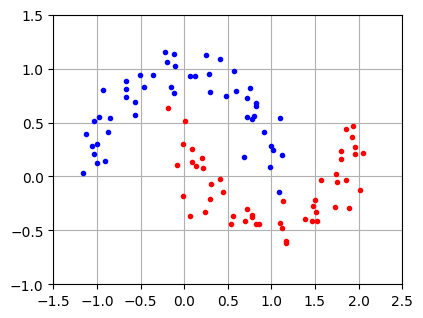

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X,y = make_moons(noise=0.12)
plt.figure(figsize=(4.5,3.5))
plot_dataset(X,y,[-1.5, 2.5, -1, 1.5])

/home/ashish/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


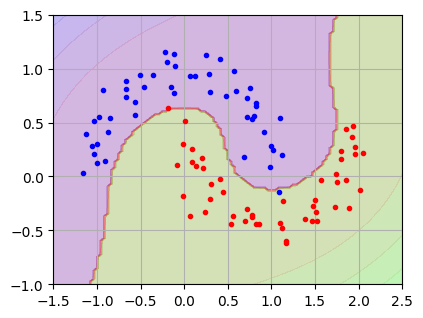

In [5]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('polynomial_fet',PolynomialFeatures(degree=3))
    ,('scaler',StandardScaler())
    ,('lin_clf',LinearSVC(C=10,loss='hinge',max_iter=3200))
])

polynomial_svm_clf.fit(X,y)

plt.figure(figsize=(4.5,3.5))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y,[-1.5, 2.5, -1, 1.5])
plt.show()

#### Polynomial Kernel 
*** 
* Adding Polynomial Features work fine but with a lot of features model become slow 
* In SVMs we can use the mathematical trchnique calleds ***kernel trick*** ie. a method to project non-linear data on a heigher dimension space to make it easier for classification
* We can control fitting with *degree* hypreparameter , higher the value more the fitting/overfitting 

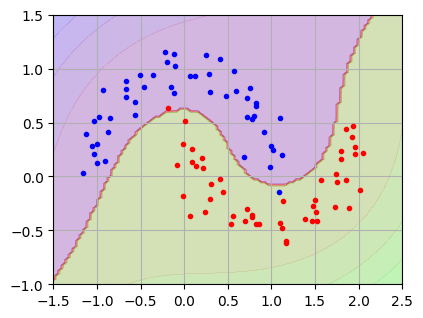

In [6]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('Std_scaler',StandardScaler())
    ,('Poly_Kernel_SVM',SVC(kernel='poly',degree=3,coef0=1,C=5))
])

poly_kernel_svm_clf.fit(X,y)

plt.figure(figsize=(4.5,3.5))
plot_predictions(poly_kernel_svm_clf,[-1.5, 2.5, -1, 1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

#### Adding Similarity Feature
***
~ The idea is to take landmark and use the instances's similarity from each point as feature , this will increase the dimensionality of data and make it easier to classify<br>
~ The simplest way to find landmark is to consider each instance as landmark and find similarity with it<br>
~ The Downside is that if we have data with n feature and m instances we will end up with m feature and m instances , and for huge dataset we might create too many feature
<br><br>
*to find similarity we can use similarity function like* ***Gaussian Radical Basis Function(RBF)***<br>
- x is instance
- l is landmark
<img src='https://i.ibb.co/HdTHwpC/Screenshot-from-2022-11-03-21-57-45.png' width=250px>

#### Gaussian RBF Kernel
***
* Just like polynomial feature , similarity method is also useful but again computational expensive
* Hence , Again the kernel trick will come handy , the hyperparameter here will be ***γ(gamma)*** overfitting can be controled with lower γ value , and C as usual (High C value mean model will lower the margin-voilation)

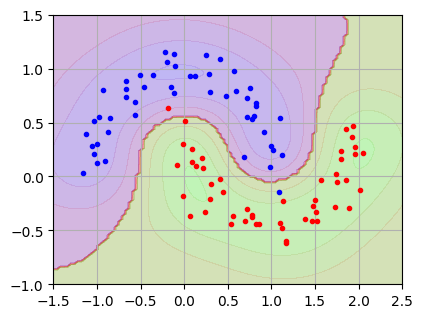

In [7]:
rbf_kernel_svm_clf = Pipeline([
    ('Std_scaler',StandardScaler()),
    ('rbf_kernel',SVC(kernel='rbf', gamma=1.2, C=0.8))
])

rbf_kernel_svm_clf.fit(X,y)

#plotting
plt.figure(figsize=(4.5,3.5))
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plot_predictions(rbf_kernel_svm_clf,[-1.5,2.5,-1,1.5])

##### Conclusion
***
<img src='https://i.ibb.co/HPbzGjm/Screenshot-from-2022-11-04-11-46-33.png' width=80%>

### SVM Regression
* its just reverse of SVM classification in which we fit the larget posible streen/margin but limiting the margin-voilation , in SVM regression we try to fit as many instances we can on street while limiting the margin-voilation

In [75]:
#### Genrating Random linear dataset ####
X = np.random.rand(100,1)
y = ((X * 5) + 2 + np.random.randn(100,1)).ravel()

In [72]:
def plot_svm_regression(reg,X,y,axes):
    x = np.linspace(axes[0],axes[1],100).reshape(100,1)
    y_pred = reg.predict(x)
    #### Plotting SVM ####
    plt.plot(x,y_pred,'r-')
    plt.plot(x,y_pred-reg.epsilon,'r--')
    plt.plot(x,y_pred+reg.epsilon,'r--')
    #### Ploting Dataset ####
    plt.plot(X,y,'b.')
    plt.axis(axes)
    plt.show()

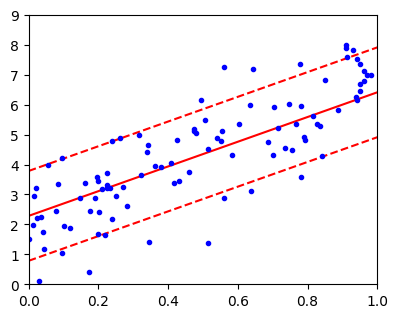

In [76]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

plt.figure(figsize=(4.5,3.5))
plot_svm_regression(svm_reg,X,y,[0,1,0,9])

#### Non-linear regreesion can also be done with help of kernel trick

In [104]:
#### Genrating Random quadritic dataset ####
X = 2* np.random.rand(100,1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(100, 1)/10).ravel()

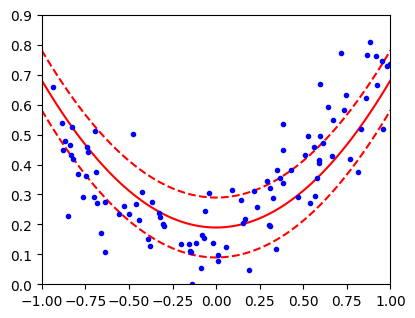

In [114]:
from sklearn.svm import SVR

poly_svm_reg = SVR(kernel='poly',degree=2,C=100,epsilon=0.1)
poly_svm_reg.fit(X,y)

plt.figure(figsize=(4.5,3.5))
plot_svm_regression(poly_svm_reg,X,y,[-1,1,0,0.9])

##### End NOTE :
* study the mathemetical aspect of SVMs to get the better understanding